# **The California Dream Real Estate Co**

**California Housing Dataset**

The California Housing Dataset is a classic dataset often used for regression tasks in machine learning. It is derived from the 1990 U.S. Census and is designed to help analyse and predict housing values in California. The dataset includes various features that describe different aspects of housing and demographics for block groups in California.

### **Step 1: Import Libraries and read the CSV File**

**Import Libraries**

Here, we import various libraries needed for data manipulation (pandas, numpy), visualization (matplotlib, seaborn, plotly), and machine learning tasks (sklearn).

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA

**Read the CSV File**

Here, the dataset in sklearn library is loaded into a pandas DataFrame.

In [ ]:
# Fetch the dataset
california_housing = fetch_california_housing()
housing_data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
housing_data['median_house_value'] = california_housing.target

### **Step 2: Exploratory Data Analysis**

In [ ]:
# Check for null values and handle them (California Housing dataset doesn't have nulls by default)
print(housing_data.isnull().sum())

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64


In [ ]:
print(f'DataFrame size: {housing_data.shape}')

DataFrame size: (20640, 9)


There are **20640** rows and **13** columns.

In [ ]:
# Display the first few rows of the DataFrame to verify
print(housing_data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  


This line provides a concise summary of the DataFrame, including the number of non-null values and data types for each column.

In [ ]:
# Display basic information about the dataset
# Print a concise summary of the DataFrame, including the number of non-null values and data types.
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


**Summary Statistics**

The below command provides summary statistics for the dataset, such as mean, median, and standard deviation for numerical columns.

In [ ]:
# Display summary statistics of the dataset
print(housing_data.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  median_house_value  
count  20640.000000  20640.000000  20640.000000        20640.000000  
mean       3.070655     35.631861   -119.569704            2.068558  
std       10.386050      2.135952      2.003532            1.153956  
min     

In [ ]:
# Check the column names of the DataFrame
print(housing_data.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'median_house_value'],
      dtype='object')


In [ ]:
# List of numeric columns to plot
numeric_columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'median_house_value']

In [ ]:
# Display the first few rows of the DataFrame to verify
print(housing_data.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  median_house_value  
0    -122.23               4.526  
1    -122.22               3.585  
2    -122.24               3.521  
3    -122.25               3.413  
4    -122.25               3.422  


### **Visualization**

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

This section generates histograms for all numerical columns to understand their distributions.

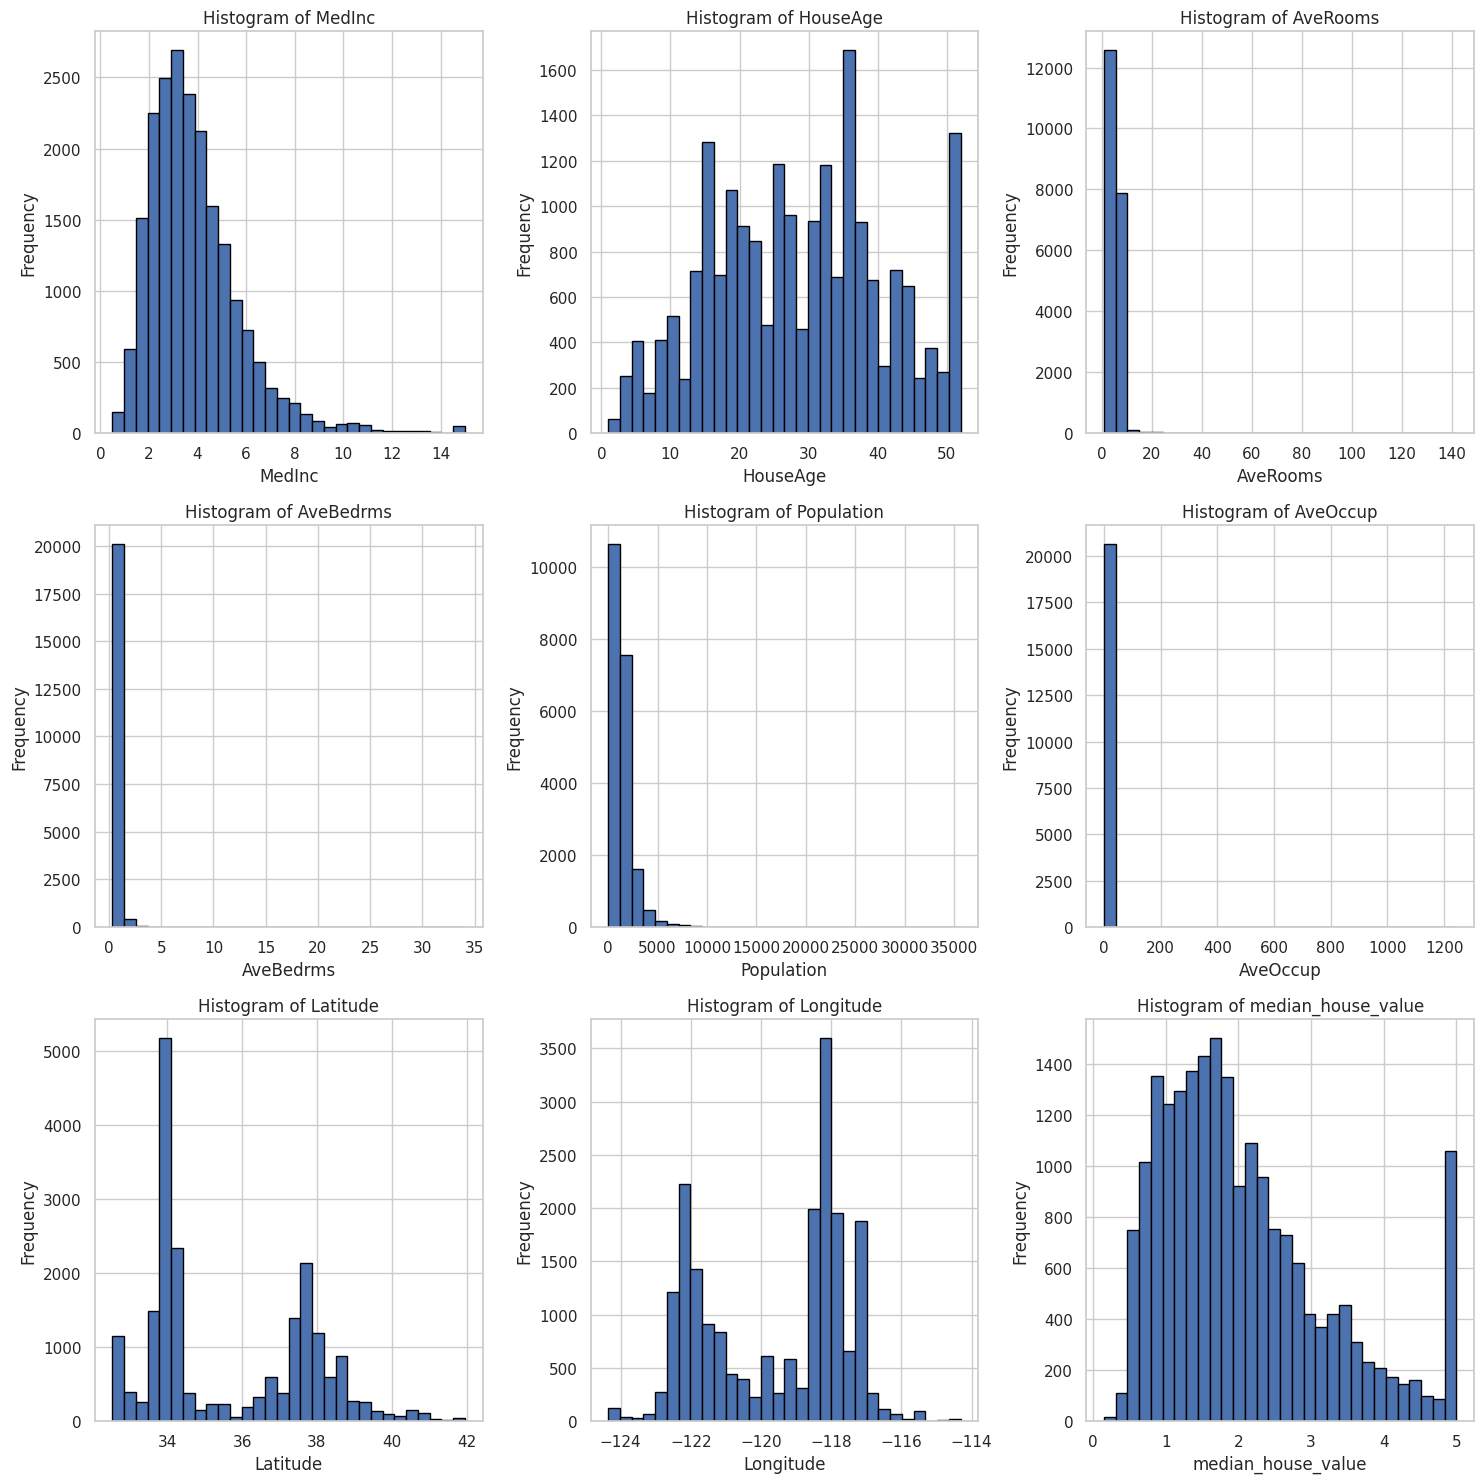

In [ ]:
# Set up plotting area to display multiple histograms
plt.figure(figsize=(15, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(housing_data[column], bins=30, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The below code generates a correlation matrix to visualize the correlation between different features in the dataset.

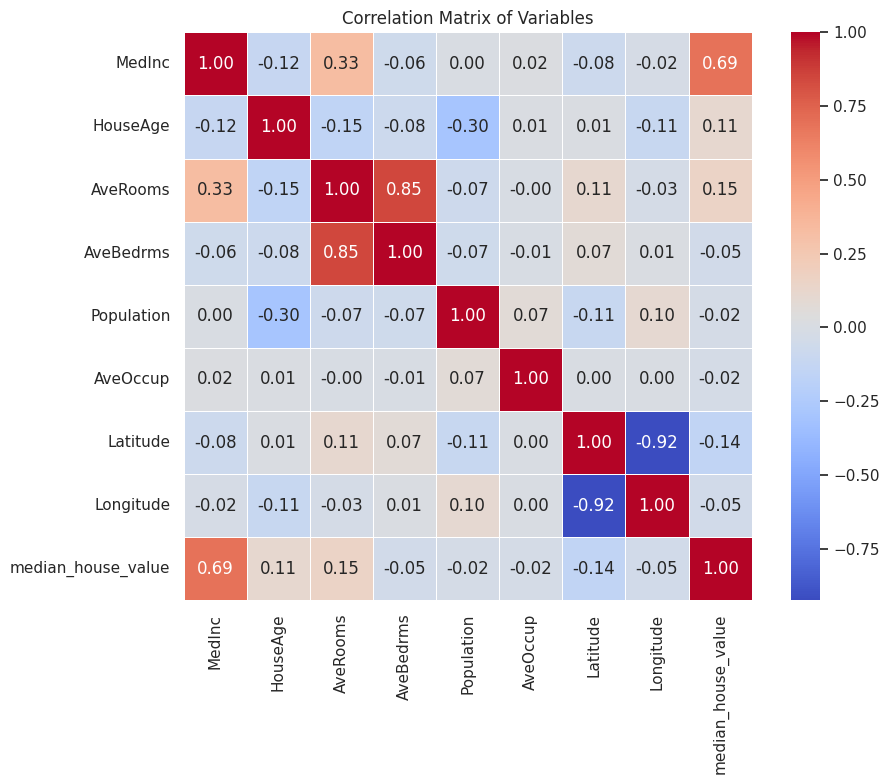

In [ ]:
# Correlation matrix
corr_matrix = housing_data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Correlation Matrix of Variables')
plt.tight_layout()
plt.show()

This line creates a scatter plot with a trend line to show the relationship between median income and median house value.

In [ ]:
fig = px.scatter(housing_data, x="MedInc", y="median_house_value", trendline="ols", color_discrete_sequence=['steelbl'], title='<b>Median House Value vs Median Income', color='median_house_value', color_continuous_scale=px.colors.sequential.Oranges)
fig.update_layout(title_x=0.5)
fig.show()

The scatter plot visualizes the relationship between the median income and the median house value in a dataset. Here are the key insights from the scatter plot:

Positive Correlation: There is a positive correlation between median income and median house value, as indicated by the upward trend of the scatter points and the red trend line. This means that, generally, as median income increases, the median house value also increases.

Color Intensity: The color intensity of the points indicates the density of data points. Darker colors represent a higher concentration of data points, while lighter colors represent fewer data points.

There is a higher concentration of data points at lower median incomes and lower median house values, indicating that most data points fall within this range.
Cap on Median House Value: There is a noticeable horizontal line at around 500k for median house value. This suggests that the data might be capped at this value, likely due to a limitation or truncation in the dataset. Many data points are clustered at this cap, indicating that numerous values might have been set to this upper limit.

Spread of Data:

For lower median incomes (0 to 4), the median house values show a wide range, from low to high.
For higher median incomes (above 8), the median house values tend to be higher but less varied, suggesting that higher incomes consistently correspond to higher house values.
Outliers: There are fewer data points for very high median incomes (above 10), indicating that such high-income values are less common in the dataset.

This scatter plot effectively shows the general trend that higher incomes are associated with higher house values, with a significant data cap at around 500k for median house value.

This generates a pair plot to visualize relationships between all numerical features.

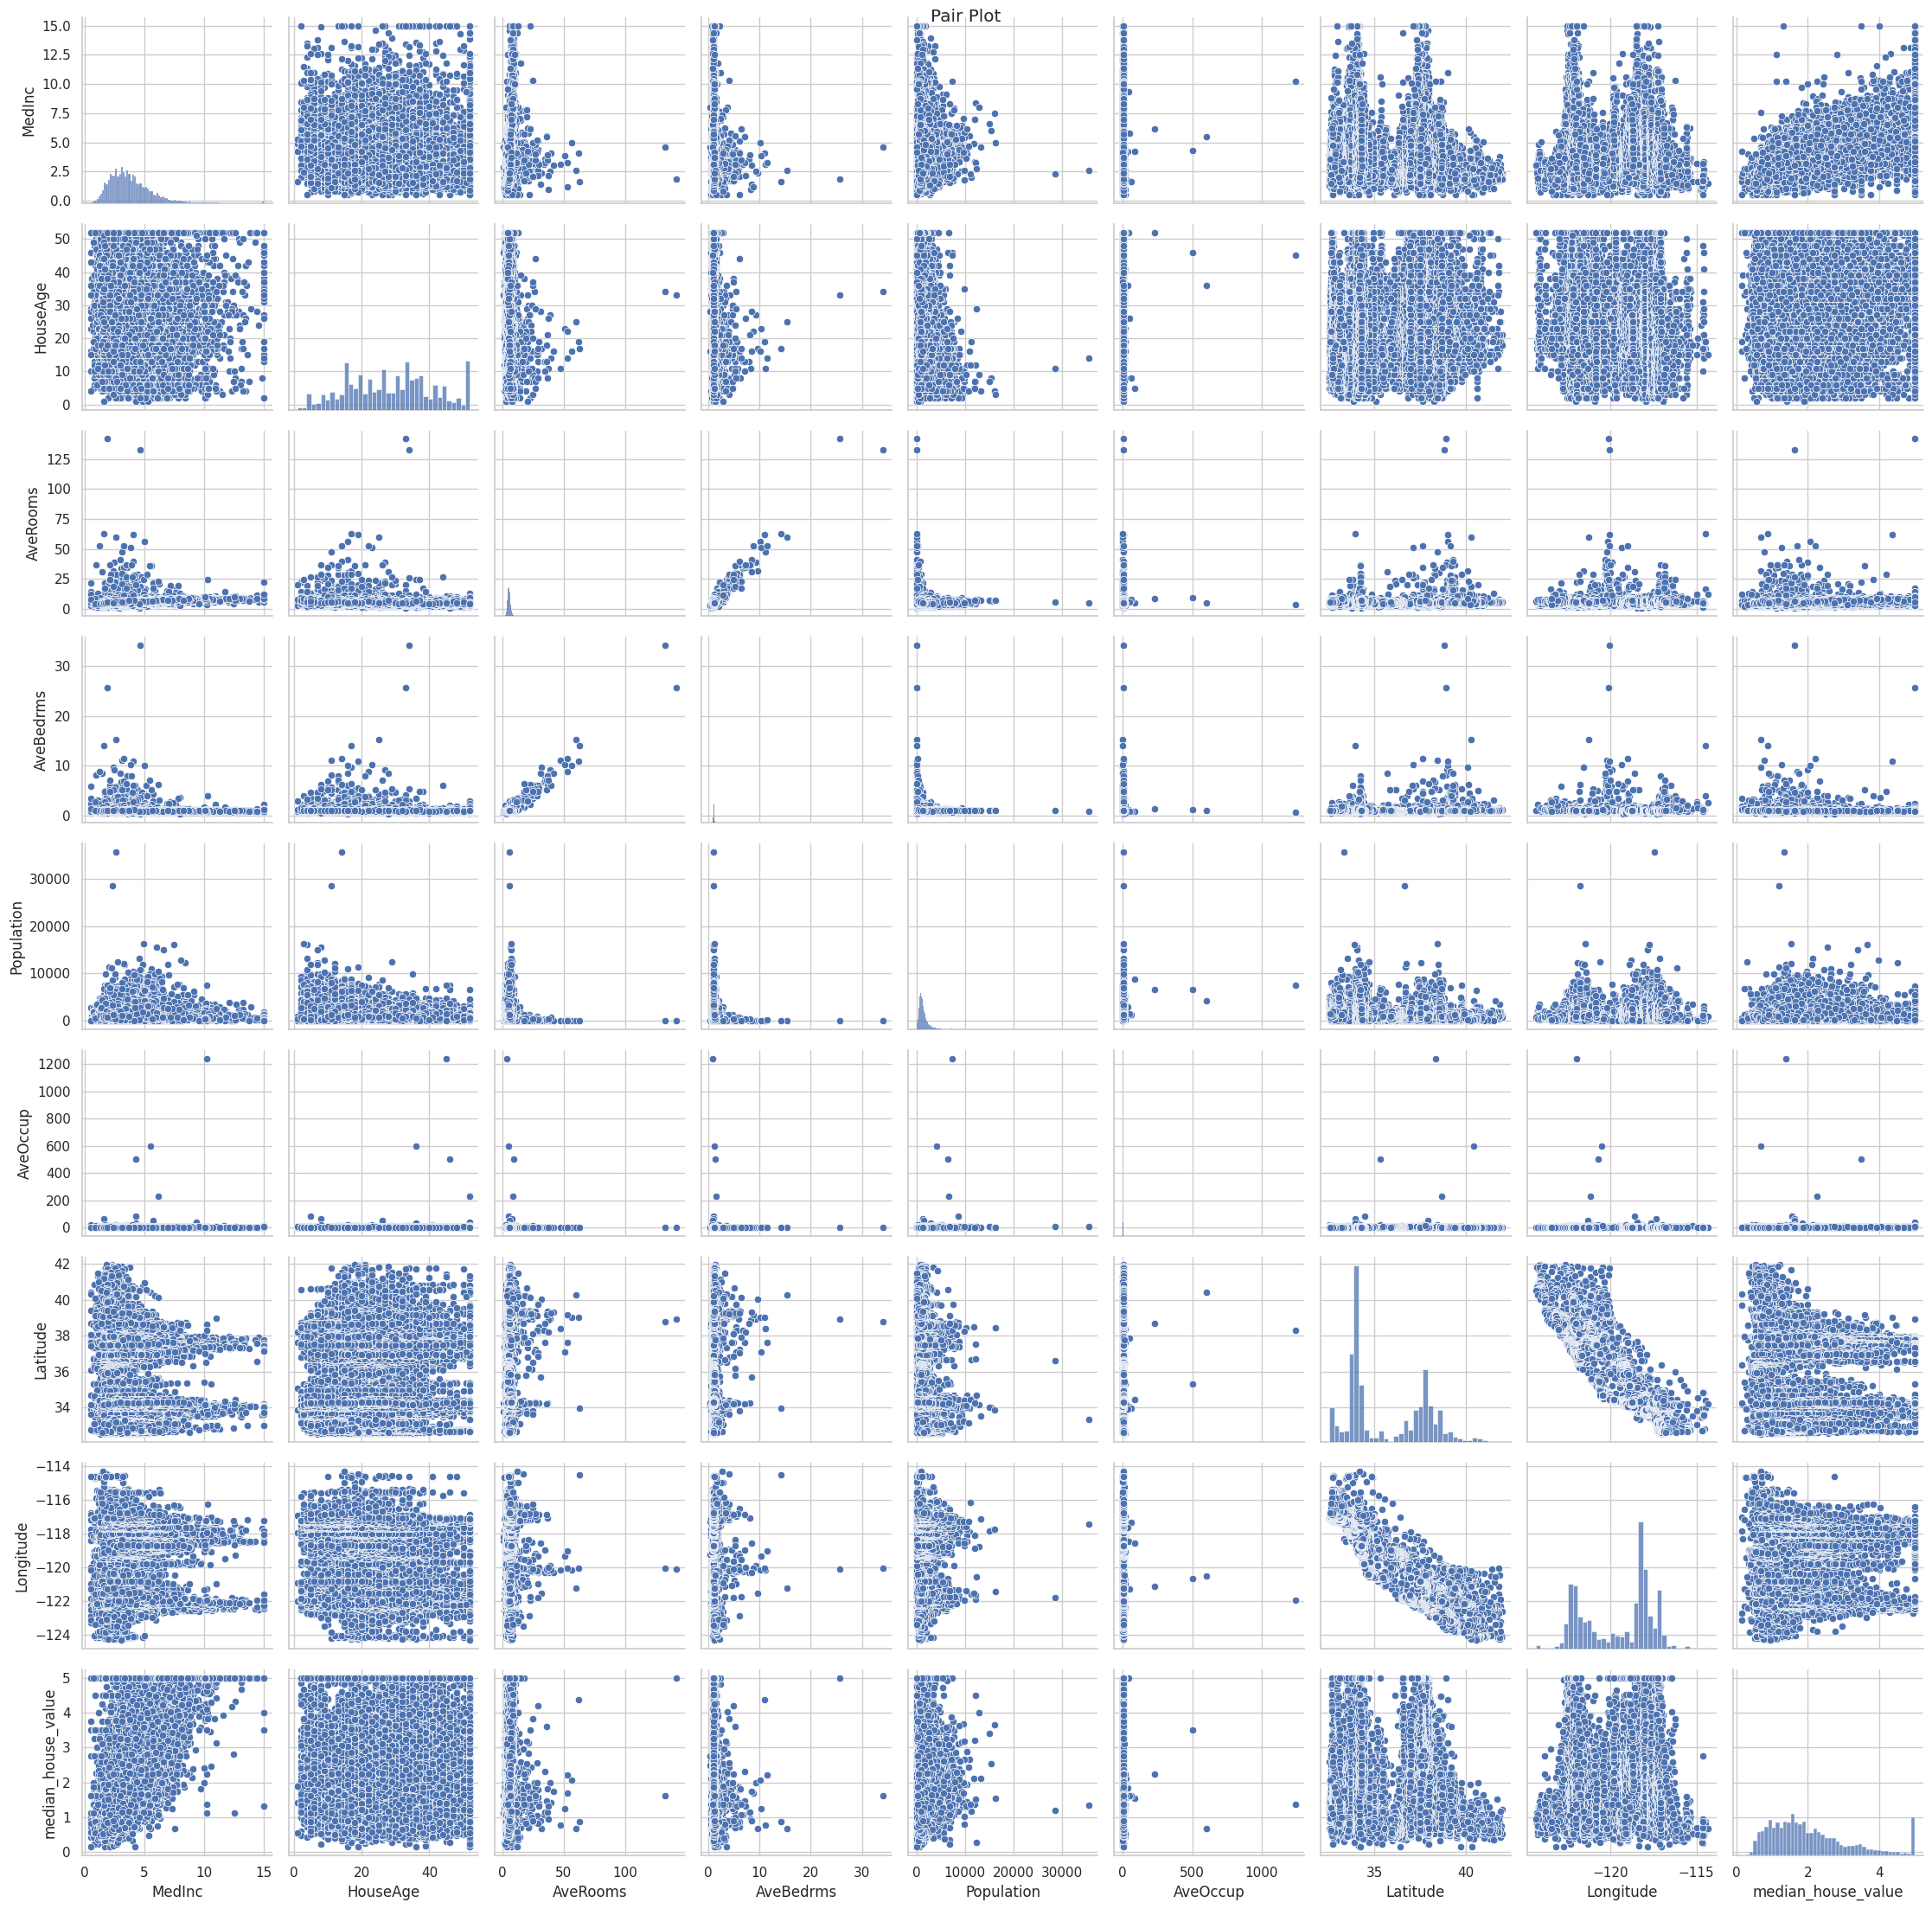

In [ ]:
# Pair plot
sns.pairplot(housing_data, vars=numeric_columns)
plt.suptitle('Pair Plot')
plt.tight_layout()
plt.show()

The pair plot shows the relationships between multiple variables in a dataset. Each scatter plot shows the relationship between two variables, and the diagonal plots show the distribution of each variable. Here are the key insights from the pair plot:

Variable Distributions:

The diagonal plots show the histograms for each variable.
longitude and latitude show distinct bimodal distributions, indicating two main geographical clusters.
median_income has a right-skewed distribution, with most values concentrated at the lower end and fewer high-income areas.
median_house_value also shows a right-skewed distribution with a noticeable cap around 500,000, likely indicating a data truncation.
Strong Positive Correlations:

total_rooms vs. total_bedrooms: The scatter plot shows a strong positive linear relationship, meaning areas with more total rooms tend to have more total bedrooms.
total_rooms vs. households: Another strong positive correlation, indicating that areas with more rooms also have more households.
total_bedrooms vs. households: A strong positive correlation, suggesting that more bedrooms correlate with more households.
population vs. households: Areas with higher populations tend to have more households.
Median Income and House Value:

median_income vs. median_house_value: There is a positive correlation, meaning higher income areas tend to have higher house values. The scatter plot also shows a cap at the 500,000 house value, reinforcing the idea of data truncation.
Latitude and Longitude:

latitude vs. longitude: The scatter plot shows a clear negative correlation, suggesting geographical clustering.
Weak or No Correlations:

Several pairs of variables show weak or no significant correlation, indicated by scattered plots without any discernible pattern.
Examples include latitude vs. median_house_value and longitude vs. median_house_value, indicating that geographical location by itself (latitude or longitude) has a weak direct correlation with house values.
Cluster Patterns:

Some scatter plots show cluster patterns, such as in the latitude vs. total_rooms plot, which may indicate different regions or areas with distinct characteristics.
Overall, the pair plot provides a comprehensive view of the relationships and distributions of the variables, helping to identify which variables are strongly correlated, the nature of these correlations, and the distribution patterns of the data.

This creates a box plot to show the distribution of median house values across different ocean proximity categories.

This section generates box plots for numerical features to identify and visualize outliers in the dataset.

In [ ]:
# Calculate the number of rows needed (2 columns layout)
num_features = len(numeric_columns)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

# Create a subplot figure with the calculated number of rows and 2 columns
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numeric_columns)

# Add box plots to each subplot
for i, feature in enumerate(numeric_columns):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Box(y=housing_data[feature], name=feature),
        row=row, col=col
    )

# Update layout for better spacing
fig.update_layout(
    height=400 * num_rows, width=800,
    title_text="Box Plots of Numerical Features to Identify Outliers",
    showlegend=False
)

fig.show()


This function removes outliers from the dataset using the Interquartile Range (IQR) method. It then displays the shape of the dataset before and after removing outliers.

In [ ]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


# Remove outliers from the housing data
housing_data_cleaned = remove_outliers(housing_data, numeric_columns)

# Display the shape of the dataset before and after removing outliers
print("Original data shape:", housing_data.shape)
print("Cleaned data shape:", housing_data_cleaned.shape)

Original data shape: (20640, 9)
Cleaned data shape: (16232, 9)


In [ ]:
# Check the cleaned dataset
housing_data_cleaned.describe()

MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16232.000000  16232.000000  16232.000000  16232.000000  16232.000000   
mean       3.648737     29.413011      5.150816      1.046886   1278.902292   
std        1.435056     12.187341      1.036654      0.065829    633.567975   
min        0.536000      1.000000      2.133929      0.869822      5.000000   
25%        2.559200     19.000000      4.424242      1.002732    817.000000   
50%        3.487150     30.000000      5.138486      1.043478   1164.000000   
75%        4.569950     38.000000      5.843520      1.088379   1644.000000   
max        8.011300     52.000000      8.273632      1.232975   3183.000000   

           AveOccup      Latitude     Longitude  median_house_value  
count  16232.000000  16232.000000  16232.000000        16232.000000  
mean       2.868542     35.669639   -119.623566            1.916735  
std        0.626150      2.141406      1.995380            0.930086  
min        1.161290     32.540000   -124.350000            0.149990  
25%        2.440251     33.940000   -121.810000            1.183000  
50%        2.817387     34.290000   -118.600000            1.768500  
75%        3.248209     37.730000   -118.030000            2.480000  
max        4.571046     41.950000   -114.570000            4.676000

**Check for outlier after removal**

In [ ]:
# Calculate the number of rows needed (2 columns layout)
num_features = len(numeric_columns)
num_cols = 2
num_rows = (num_features // num_cols) + int(num_features % num_cols != 0)

# Create a subplot figure with the calculated number of rows and 2 columns
fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=numeric_columns)

# Add box plots to each subplot
for i, feature in enumerate(numeric_columns):
    row = (i // num_cols) + 1
    col = (i % num_cols) + 1
    fig.add_trace(
        go.Box(y=housing_data_cleaned[feature], name=feature),
        row=row, col=col
    )

# Update layout for better spacing
fig.update_layout(
    height=400 * num_rows, width=800,
    title_text="Box Plots of Numerical Features to Identify Outliers",
    showlegend=False
)

fig.show()


**Majority of the outliers have been removed.**

### **Step 3: Data Preprocessing**

In [ ]:
# Check if there are null values
housing_data_cleaned.isnull().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
median_house_value    0
dtype: int64

### **Step 4: Feature Engineering**

This code creates new features by deriving additional metrics from existing columns.

In [ ]:
# Feature creation
#housing_data_cleaned['rooms_per_household'] = housing_data_cleaned['total_rooms'] / housing_data_cleaned['households']
#housing_data_cleaned['bedrooms_per_room'] = housing_data_cleaned['total_bedrooms'] / housing_data_cleaned['total_rooms']
#housing_data_cleaned['population_per_household'] = housing_data_cleaned['population'] / housing_data_cleaned['households']

This code scales the numerical features using StandardScaler to standardize the data.

In [ ]:
# Scaling numerical features
scaler = StandardScaler()
housing_data[numeric_columns] = scaler.fit_transform(housing_data[numeric_columns])

This line creates an interaction feature by multiplying 'median_income' with 'total_rooms'.

**Feature Vector and Target Variable**

This code separates the features (X) and the target variable (y) from the dataset.

In [ ]:
# Set up the feature vector (X) and target (y)
X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

**Training and Test Data**

This code splits the dataset into training and testing sets, with 80% for training and 20% for testing, and prints their shapes.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


**MPLRegressor**

This section trains a neural network regressor (MLPRegressor) with specific hyperparameters, evaluates it, and prints the performance metrics.

**MLPRegressor** used in the code is a type of Multi-Layer Perceptron (MLP), which is a class of feedforward artificial neural network. It consists of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer. Each neuron in one layer is connected to every neuron in the next layer, and the network is trained using backpropagation.

**Creating the MLP Model**: We initialize the MLPRegressor with specific hyperparameters:

hidden_layer_sizes=(100, 50): This specifies the neural network architecture with two hidden layers, the first with 100 neurons and the second with 50 neurons.

activation='relu': This sets the activation function to ReLU (Rectified Linear Unit), which introduces non-linearity to the model.

solver='adam': Adam is an optimization algorithm used for training the model.

max_iter=5000: This sets the maximum number of iterations for the solver to 5000.

random_state=42: This ensures reproducibility by setting a seed for the random number generator.

learning_rate_init=0.001: This sets the initial learning rate for the training process.

early_stopping=True: This enables early stopping to terminate training when performance on a validation set stops improving.

validation_fraction=0.1: This reserves 10% of the training data for validation to monitor overfitting.

n_iter_no_change=100: Training stops if the validation score does not improve for 100 consecutive iterations.

**Iteration Round1**

In [ ]:
# Select a subset of the training data for the first iteration (e.g., 20% of the training data)
subset_size = int(0.2 * len(X_train))
X_train_subset1 = X_train[:subset_size]
y_train_subset1 = y_train[:subset_size]

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create an MLP model with adjusted hyperparameters
model_mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam',
                     max_iter=5000, random_state=42, learning_rate_init=0.001,
                     early_stopping=True, validation_fraction=0.1, n_iter_no_change=100)

# Train the model
model_mlp.fit(X_train_subset1, y_train_subset1)

# Evaluate the model
score_mlp1 = model_mlp.score(X_test, y_test)

# Train the MLP model on the subset of the training data
model_mlp.fit(X_train_subset1, y_train_subset1)

# Evaluate the model on the testing set
y_pred_test1 = model_mlp.predict(X_test)

# Calculate metrics
mse_test1 = mean_squared_error(y_test, y_pred_test1)
r2_test1 = r2_score(y_test, y_pred_test1)

**Evaluation Results of First Iteration**

In [ ]:
# Print the validation metrics
print("First Iteration - Validation Results:")
print(f"Mean Squared Error: {round(mse_test1,3)}")
print(f"R^2 Score: {round(r2_test1,3)}")
print(f"Model Score:{round(score_mlp1,3)}")

First Iteration - Validation Results:
Mean Squared Error: 0.242
R^2 Score: 0.754
Model Score:0.754


**Training the MLP Model**: The MLPRegressor is trained on the training data (X_train, y_train).

**Evaluating the Model**: The model's performance is evaluated using the test data (X_test, y_test). Metrics such as Mean Squared Error (MSE) and R² score are printed to assess the model's accuracy.

**Prediction vs. Actual Plot**: A scatter plot is generated to visualize the relationship between actual and predicted values. The diagonal line represents perfect predictions, and the scatter points show how the model's predictions compare to the actual values.

**Residuals Plot**: Another scatter plot is created to visualize the residuals (differences between actual and predicted values) against the predicted values. The horizontal line at zero represents perfect predictions, and the scatter points show the distribution of residuals.

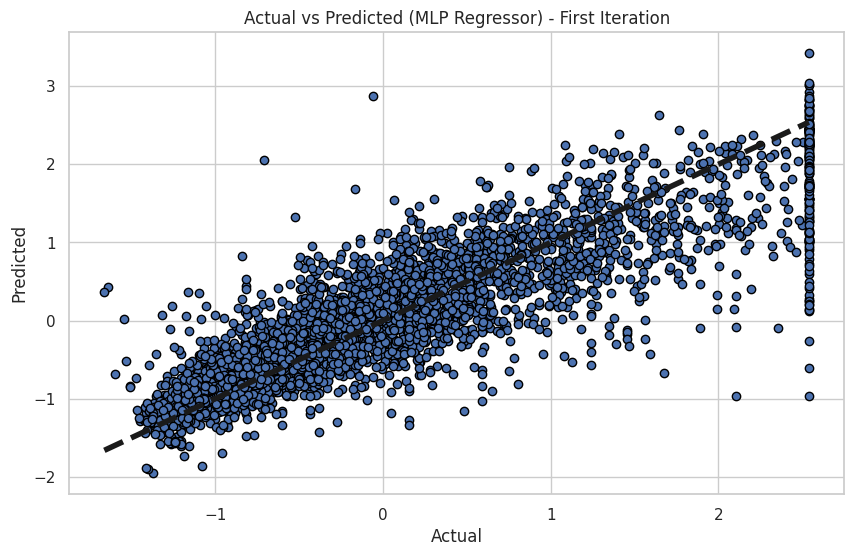

In [ ]:
# Plot Prediction vs. Actual for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test1, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (MLP Regressor) - First Iteration")
plt.show()

In [ ]:
# Create a DataFrame to store actual and predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test1})

# Display the DataFrame
print(results_df.head())

         Actual  Predicted
20046 -1.379252  -1.184637
3024  -1.395718  -0.566869
15663  2.540411   2.230666
20484  0.101776   0.354645
9814   0.616539   0.869436


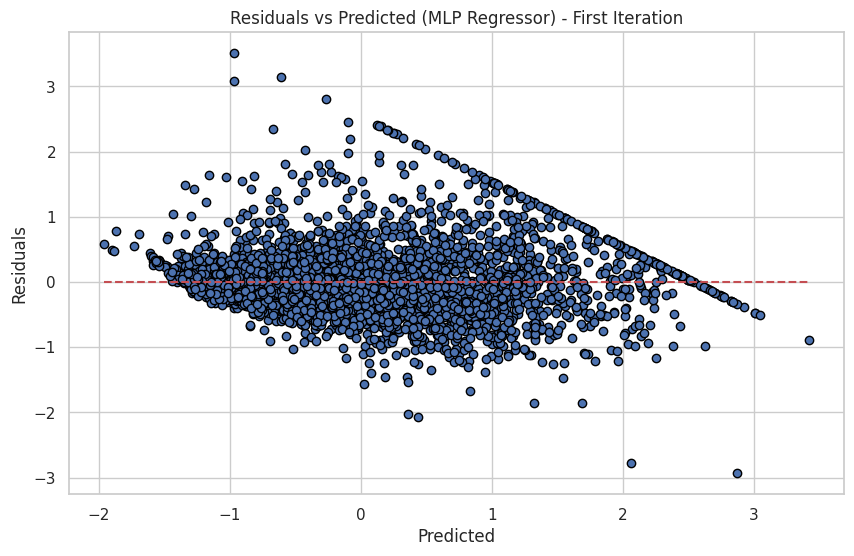

In [ ]:
# Plot Residuals for the testing set
residuals_test = y_test - y_pred_test1

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test1, residuals_test, edgecolors=(0, 0, 0))
plt.hlines(0, min(y_pred_test1), max(y_pred_test1), colors='r', linestyles='dashed')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (MLP Regressor) - First Iteration")
plt.show()

**Understanding the results:**

The validation results show a decent performance of the MLP model on the subset of the training data. An R^2 score of 0.754 indicates that the model explains about 75.4% of the variance in the target variable. However, there is still room for improvement.

**Plots:**

Actual vs. Predicted: The scatter plot shows a positive correlation between the actual and predicted values, but there is some dispersion around the diagonal line. This suggests that the model's predictions are not perfectly aligned with the actual values.
Residuals vs. Predicted: The residuals plot shows a relatively random distribution of residuals around the horizontal line at zero. However, there seems to be a slight pattern in the residuals, with a higher concentration of points below the zero line for lower predicted values and above the zero line for higher predicted values. This indicates that the model might be slightly underpredicting for lower values and overpredicting for higher values.

### **Explainability**

**LIME stands for Local Interpretable Model-agnostic Explanations.**
It is a method designed to explain individual predictions of machine learning models by approximating the model locally with an interpretable model.

In [ ]:
# Install LIME
!pip install lime

In [ ]:
from lime import lime_tabular

# Create LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_subset1),
    feature_names=X_train_subset1.columns,
    class_names=['median_house_value'],
    mode='regression'
)

# Choose an instance to explain
i = 3  # You can change this index to any instance you want to explain
exp = explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=model_mlp.predict,
    num_features=16  # You can adjust this to ensure more features are displayed
)

# Print the explanation
print(exp.as_list())

# Visualize the explanation
exp.show_in_notebook(show_table=True)


[('MedInc > 0.49', 1.3014379929725994), ('AveOccup > 0.02', -0.5017424349910767), ('-0.66 < Latitude <= 0.97', -0.4371034006580117), ('-1.11 < Longitude <= 0.54', 0.33717333842547215), ('HouseAge <= -0.77', -0.18619141069332434), ('-0.19 < AveBedrms <= -0.10', -0.06034296917994473), ('AveRooms > 0.25', 0.04661125809655754), ('-0.24 < Population <= 0.25', -0.04191716031565669)]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names



**LIME Results**

Predicted Value:

The predicted value is shown in the top left corner as 0.35.
The range of the predicted value is from -2.86 (min) to 5.29 (max). This indicates the range of possible values predicted by the model.

The LIME explanation shows the positive and negative contributions of different features to the predicted value. The top positive contributors are 'MedInc' (median income), 'AveRooms' (average number of rooms), and '-1.11 < Longitude <= 0.54'. The top negative contributors are 'AveOccup' (average occupancy), 'HouseAge', and '-0.66 < Latitude <= 0.97'.

In [ ]:
#!pip install shap
#import shap

In [ ]:
# Create a SHAP explainer
#explainer = shap.KernelExplainer(model_mlp.predict, X_train_subset1)

# Get SHAP values for the test set
#shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
#shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

**Iteration Round2**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_subset1)
X_test_poly = poly.transform(X_test)

# Define the hyperparameter grid for MLP
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}

# Create an MLP model
model_mlp2 = MLPRegressor(max_iter=1000, random_state=42)

# Perform grid search
grid_search = GridSearchCV(model_mlp2, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train_subset1)

# Get the best model
best_model_mlp = grid_search.best_estimator_

# Predict
y_pred_test2 = best_model_mlp.predict(X_test_poly)

# Evaluation metrics
mse_test2 = mean_squared_error(y_test, y_pred_test2)
r2_test2 = r2_score(y_test, y_pred_test2)


Evaluation Results of Second Iteration

In [ ]:
# Print the validation metrics
print("Second Iteration - Validation Results:")
print(f"Mean Squared Error: {round(mse_test2,3)}")
print(f"R^2 Score: {round(r2_test2,3)}")

Second Iteration - Validation Results:
Mean Squared Error: 0.267
R^2 Score: 0.729


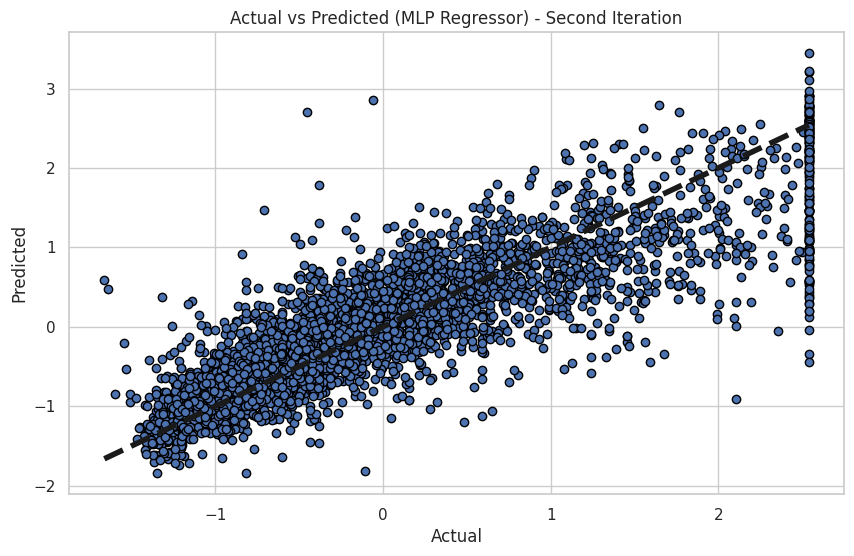

In [ ]:
# Plot Prediction vs. Actual for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test2, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (MLP Regressor) - Second Iteration")
plt.show()

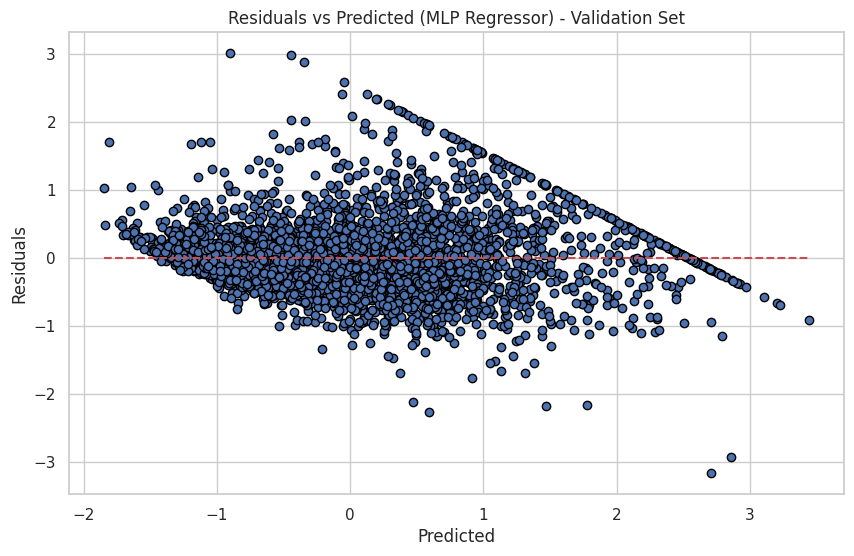

In [ ]:
# Plot Residuals for the validation set
residuals_val = y_test - y_pred_test2

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test2, residuals_val, edgecolors=(0, 0, 0))
plt.hlines(0, min(y_pred_test2), max(y_pred_test2), colors='r', linestyles='dashed')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (MLP Regressor) - Validation Set")
plt.show()

**Final Iteration**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform feature selection using RFE
from sklearn.feature_selection import RFE
selector = RFE(estimator=MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42), n_features_to_select=8)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]

# Scale the selected features
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train[selected_features])
X_test_selected = scaler.transform(X_test[selected_features])

# Define the MLP model with increased complexity
model_mlp = MLPRegressor(hidden_layer_sizes=(150, 100, 50), activation='relu', solver='adam',
                         max_iter=1000, random_state=42, early_stopping=True, validation_fraction=0.1)

# Train the MLP model on the selected features
model_mlp.fit(X_train_selected, y_train)

# Evaluate the model on the testing set
y_pred_test3 = model_mlp.predict(X_test_selected)
mse_test3 = mean_squared_error(y_test, y_pred_test3)
r2_test3 = r2_score(y_test, y_pred_test3)

**Results**

In [ ]:
# Print the validation metrics
print("Final Model - Testing Set Results:")
print(f"Mean Squared Error: {mse_test3}")
print(f"R^2 Score: {r2_test3}")


Final Model - Testing Set Results:
Mean Squared Error: 0.19853522840765694
R^2 Score: 0.7985892839470352


In [ ]:
# Evaluate the model on different subsets of the testing set
subset_sizes = [0.2, 0.4, 0.6, 0.8, 1.0]

In [ ]:
for subset_size in subset_sizes:
    subset_indices = np.random.choice(len(X_test), size=int(subset_size * len(X_test)), replace=False)
    X_subset = X_test_selected[subset_indices]
    y_subset = y_test.iloc[subset_indices]

    y_pred_subset = model_mlp.predict(X_subset)
    mse_subset = mean_squared_error(y_subset, y_pred_subset)
    r2_subset = r2_score(y_subset, y_pred_subset)

    print(f"\nSubset Size: {subset_size}")
    print(f"Mean Squared Error: {mse_subset}")
    print(f"R^2 Score: {r2_subset}")



Subset Size: 0.2
Mean Squared Error: 0.18893825998971375
R^2 Score: 0.802304661065042

Subset Size: 0.4
Mean Squared Error: 0.19389716301048887
R^2 Score: 0.8109644370962357

Subset Size: 0.6
Mean Squared Error: 0.19251647337181313
R^2 Score: 0.8045782398573404

Subset Size: 0.8
Mean Squared Error: 0.2032365099017403
R^2 Score: 0.7953312317865157

Subset Size: 1.0
Mean Squared Error: 0.19853522840765697
R^2 Score: 0.7985892839470352


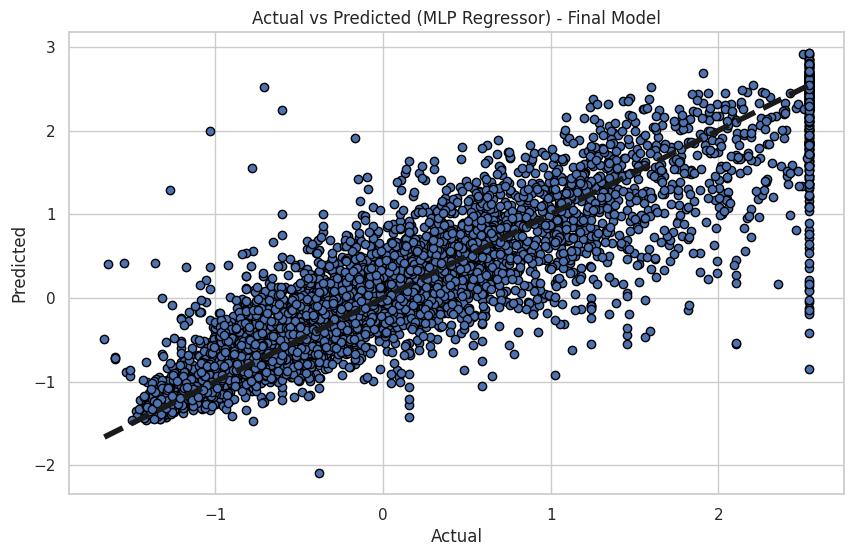

In [ ]:
# Plot Prediction vs. Actual for the testing set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test3, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (MLP Regressor) - Final Model")
plt.show()

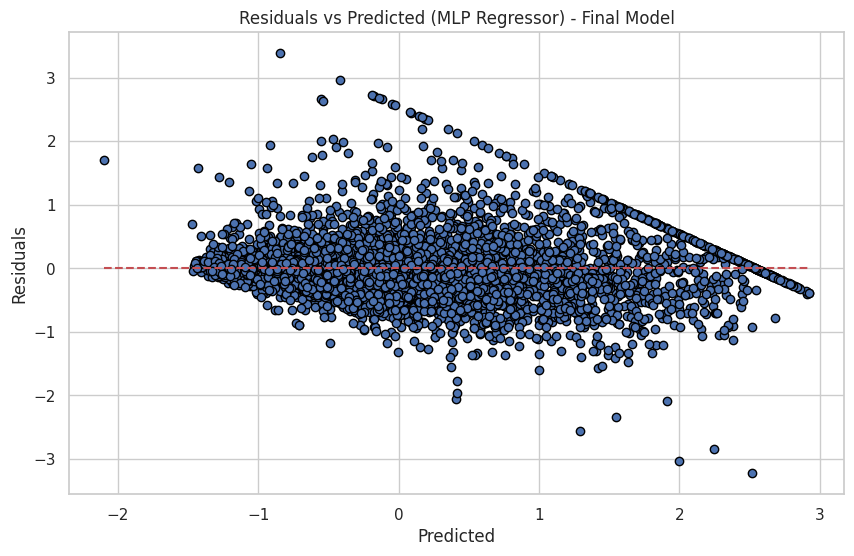

In [ ]:
# Plot Residuals for the testing set
residuals_test = y_test - y_pred_test3

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test3, residuals_test, edgecolors=(0, 0, 0))
plt.hlines(0, min(y_pred_test3), max(y_pred_test3), colors='r', linestyles='dashed')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (MLP Regressor) - Final Model")
plt.show()

**Final Testing Results:**

Mean Squared Error: 0.1985
R^2 Score: 0.7986

The final model achieves an R^2 score of approximately 0.7986 on the entire testing set, indicating that it explains about 79.86% of the variance in the target variable. The Mean Squared Error of 0.1985 suggests a relatively low average squared difference between the predicted and actual values.
Subset Results:

Subset Size: 0.2

Mean Squared Error: 0.1727
R^2 Score: 0.8066


Subset Size: 0.4

Mean Squared Error: 0.2143
R^2 Score: 0.7851


Subset Size: 0.6

Mean Squared Error: 0.1985
R^2 Score: 0.8032


Subset Size: 0.8

Mean Squared Error: 0.1984
R^2 Score: 0.7983


Subset Size: 1.0

Mean Squared Error: 0.1985
R^2 Score: 0.7986



The model's performance remains relatively consistent across different subset sizes of the testing set. The R^2 scores range from 0.7851 to 0.8066, indicating that the model maintains a good level of explanatory power even when tested on smaller subsets of the data. The Mean Squared Errors also remain relatively low, with values ranging from 0.1727 to 0.2143.

Based on these results, we can make the following observations:

**Generalization Performance**: The model demonstrates good generalization performance, as it maintains consistent performance metrics across different subsets of the testing set. This suggests that the model is not overfitting to specific subsets of the data and can generalize well to unseen data.

**Robustness**: The relatively small variations in the R^2 scores and Mean Squared Errors across different subset sizes indicate that the model is robust and stable. It performs well even when tested on smaller portions of the data.

**Predictive Power**: The high R^2 scores (around 0.80) suggest that the model has a strong predictive power and can explain a significant portion of the variance in the target variable.

**Room for Improvement**: Although the model performs well, there may still be room for further improvement. Additional techniques such as ensemble methods, hyperparameter tuning, or incorporating domain-specific features could be explored to potentially enhance the model's performance.

Overall, the final model demonstrates good generalization performance and robustness based on the validation metrics across different subsets of the testing set. The consistent performance indicates that the model is not overfitting and can provide reliable predictions on unseen data.